In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_8996\4164042217.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

Columns with missing values: ‘store_and_fwd_flag’, ‘RatecodeID’, ‘passenger_count’, ‘ehail_fee’, ‘payment_type’, ‘trip_type’, 'congestion_surcharge'

Columns with mismatched data types: ‘VendorID’, ‘lpep_pickup_datetime’, ‘lpep_dropoff_datetime’, ‘PULocationID’, ‘DOLocationID’, ‘payment_type’, ‘trip_type’, 'RatecodeID'

In [ ]:
# Convert data types to ‘Datetime’ for the required features (‘lpep_pickup_datetime’, lpep_dropoff_datetime')

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [ ]:
# Convert the data type that indicates the ID/Type from int/float to object (so that it is not considered a number, but a category).

df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'trip_type', 'RatecodeID']] = df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'trip_type', 'RatecodeID']].astype(str)

In [7]:
df.dtypes

VendorID                         object
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                     object
trip_type                        object
congestion_surcharge            float64
dtype: object

In [8]:
df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge
count,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000
mean,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,0.726748
std,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,1.212836
min,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,-2.750000
25%,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,0.000000
50%,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,0.000000
75%,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.750000
max,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,2.750000


### Handling Missing Values and Ambiguous Data

Columns containing missing values: ‘store_and_fwd_flag’, ‘RatecodeID’, ‘passenger_count’, ‘ehail_fee’, ‘payment_type’, ‘trip_type’, 'congestion_surcharge'

In [ ]:
# Some features that have been converted to string data types have undetectable ‘nan’ values. Therefore, it is necessary to change the ‘nan’ value to ‘null numpy’ so that it can be detected.

df.replace('nan', np.NaN, inplace=True)

In [10]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [ ]:
# Percentage of missing values (measures how much missing values affect the amount of data)

(4324/68211)*100

6.33915350896483

In [ ]:
# Drop the ehail_fee column because it is not needed. It has all null values.

df.drop('ehail_fee', axis=1, inplace=True)

In [ ]:
# There is a value that should not be in the RatecodeID column (see the dataset description pdf).
# df[df['RatecodeID'] == '99.0']

df = df[df.RatecodeID != '99.0']
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [14]:
df[df['store_and_fwd_flag'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [15]:
df.dropna(inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8996\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [16]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [17]:
df.shape

(63877, 19)

In [ ]:
# There is a value of 0 in the ‘passenger_count’ feature, which is impossible for a taxi to be running without passengers. 
# Therefore, it is possible that there was human error in this case.
# The value 0 in the ‘passenger_count’ feature is not included in the data.

df = df[~((df['passenger_count'] == 0))]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63541 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63541 non-null  object        
 1   lpep_pickup_datetime   63541 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63541 non-null  datetime64[ns]
 3   store_and_fwd_flag     63541 non-null  object        
 4   RatecodeID             63541 non-null  object        
 5   PULocationID           63541 non-null  object        
 6   DOLocationID           63541 non-null  object        
 7   passenger_count        63541 non-null  float64       
 8   trip_distance          63541 non-null  float64       
 9   fare_amount            63541 non-null  float64       
 10  extra                  63541 non-null  float64       
 11  mta_tax                63541 non-null  float64       
 12  tip_amount             63541 non-null  float64       
 13  t

In [20]:
df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,63541.000000,63541.000000,63541.000000,63541.000000,63541.000000,63541.000000,63541.000000,63541.000000,63541.000000,63541.000000
mean,1.322878,2.578009,16.086173,0.878228,0.622940,2.041567,0.143960,0.948965,21.213437,0.727589
std,0.977009,6.774994,13.287074,1.289535,0.362563,2.999992,1.010482,0.202176,15.139702,1.213287
min,1.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,-2.750000
25%,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,0.000000
50%,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,0.000000
75%,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.750000
max,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,2.750000


Looking at the describe() table above, it is possible that this data contains outliers. This can be seen from the significant difference between the median value (50% or Q2) and the mean value.

In [21]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [22]:
df.to_csv('tlc_clean.csv')

In [ ]:
# 1. Vendors that generate the most expenses (VendorID and total_amount)

top_vendor = df.groupby('VendorID').agg(TotalAmount = ('total_amount', 'sum')).reset_index()
top_vendor

,VendorID,TotalAmount
0,1,187145.20
1,2,1160777.77


<AxesSubplot: xlabel='VendorID', ylabel='TotalAmount'>

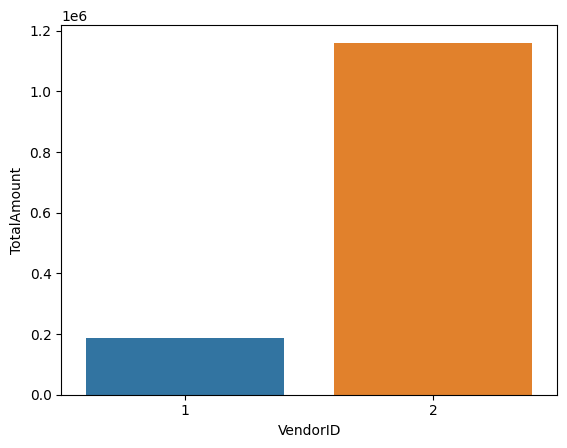

In [24]:
top_vendor['VendorID'] = top_vendor['VendorID'].astype(str)
sns.barplot(data = top_vendor, x='VendorID', y='TotalAmount')

In [ ]:
# 2. Based on trip type, which is the most detrimental in terms of total amount?

type_loss = df.groupby(['trip_type', 'payment_type']).agg(TotalAmount = ('total_amount', sum)).reset_index()
type_loss

,trip_type,payment_type,TotalAmount
0,1.0,1.0,896977.91
1,1.0,2.0,401640.32
2,1.0,3.0,1961.30
3,1.0,4.0,397.05
4,1.0,5.0,29.50
5,2.0,1.0,34192.01
6,2.0,2.0,12574.88
7,2.0,3.0,150.00
8,2.0,4.0,0.00


<AxesSubplot: xlabel='trip_type', ylabel='TotalAmount'>

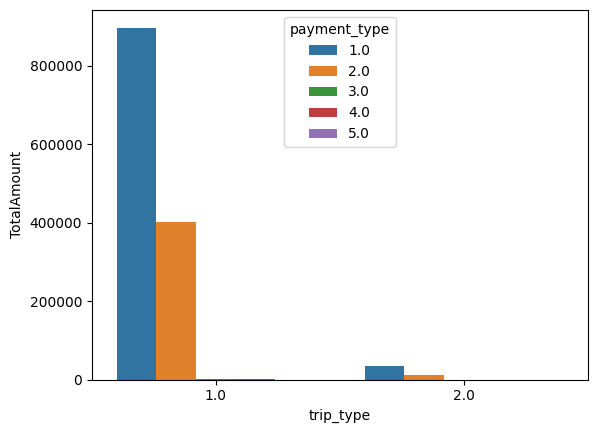

In [50]:
type_loss['trip_type'] = type_loss['trip_type'].astype(str)
type_loss['payment_type'] = type_loss['payment_type'].astype(str)
sns.barplot(data = type_loss, x='trip_type', y='TotalAmount', hue='payment_type')

In [ ]:
# 3. Which cities/areas are most frequently visited by drivers to pick up customers?

top_pickup = df.groupby('PULocationID').agg(CountPickup = ('PULocationID', 'count')).reset_index().sort_values('CountPickup', ascending=False).head(10)
top_pickup

,PULocationID,CountPickup
198,74,12933
199,75,8779
219,95,3812
166,41,3714
52,166,3595
206,82,2862
168,43,2845
220,97,2135
193,7,1821
129,244,1623


<AxesSubplot: xlabel='PULocationID', ylabel='CountPickup'>

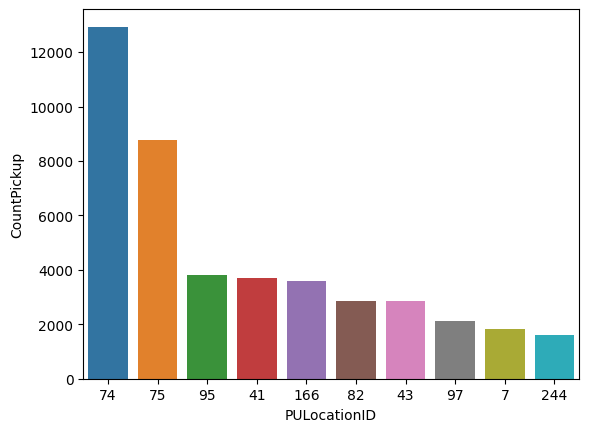

In [55]:
top_pickup['PULocationID'] = top_pickup['PULocationID'].astype(str)
sns.barplot(data = top_pickup, x='PULocationID', y='CountPickup')

In [ ]:
# 4. Which areas are most frequently visited by drivers to drop off customers?

top_dropoff = df.groupby('DOLocationID').agg(CountDropoff = ('DOLocationID', 'count')).reset_index().sort_values('CountDropoff', ascending=False).head(10)
top_dropoff

,DOLocationID,CountDropoff
223,75,3402
222,74,3282
142,236,2641
189,41,2516
190,42,2235
144,238,2232
68,166,2170
244,95,1593
171,263,1504
145,239,1400


<AxesSubplot: xlabel='DOLocationID', ylabel='CountDropoff'>

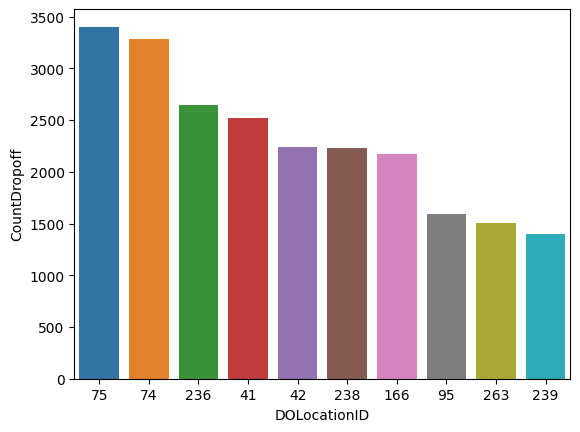

In [57]:
top_dropoff['DOLocationID'] = top_dropoff['DOLocationID'].astype(str)
sns.barplot(data = top_dropoff, x='DOLocationID', y='CountDropoff')

### Handle Fitur Numerikal

In [25]:
df_num = df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']]
df_num

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,2.75
1,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,0.00
2,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,0.00
3,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,0.00
4,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,0.00
...,...,...,...,...,...,...,...,...,...,...
63882,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,0.00
63883,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,0.00
63884,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,0.00
63885,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,2.75


#### Correlation

In [26]:
df_num.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,0.007050,0.012172,-0.003757,-0.066477,0.026176,0.003950,0.028821,0.018864,0.022664
trip_distance,0.007050,1.000000,0.295731,0.034100,-0.025279,0.133861,0.158609,0.009835,0.305483,0.084844
fare_amount,0.012172,0.295731,1.000000,0.023056,-0.015893,0.276890,0.313456,0.066691,0.966681,0.150011
extra,-0.003757,0.034100,0.023056,1.000000,0.148087,0.129960,0.087625,0.087939,0.133345,0.087620
mta_tax,-0.066477,-0.025279,-0.015893,0.148087,1.000000,-0.049473,0.017385,0.189298,-0.020066,0.013300
tip_amount,0.026176,0.133861,0.276890,0.129960,-0.049473,1.000000,0.161863,0.021327,0.482264,0.266329
tolls_amount,0.003950,0.158609,0.313456,0.087625,0.017385,0.161863,1.000000,0.012304,0.379009,-0.036979
improvement_surcharge,0.028821,0.009835,0.066691,0.087939,0.189298,0.021327,0.012304,1.000000,0.085626,0.005712
total_amount,0.018864,0.305483,0.966681,0.133345,-0.020066,0.482264,0.379009,0.085626,1.000000,0.259300
congestion_surcharge,0.022664,0.084844,0.150011,0.087620,0.013300,0.266329,-0.036979,0.005712,0.259300,1.000000


<AxesSubplot: >

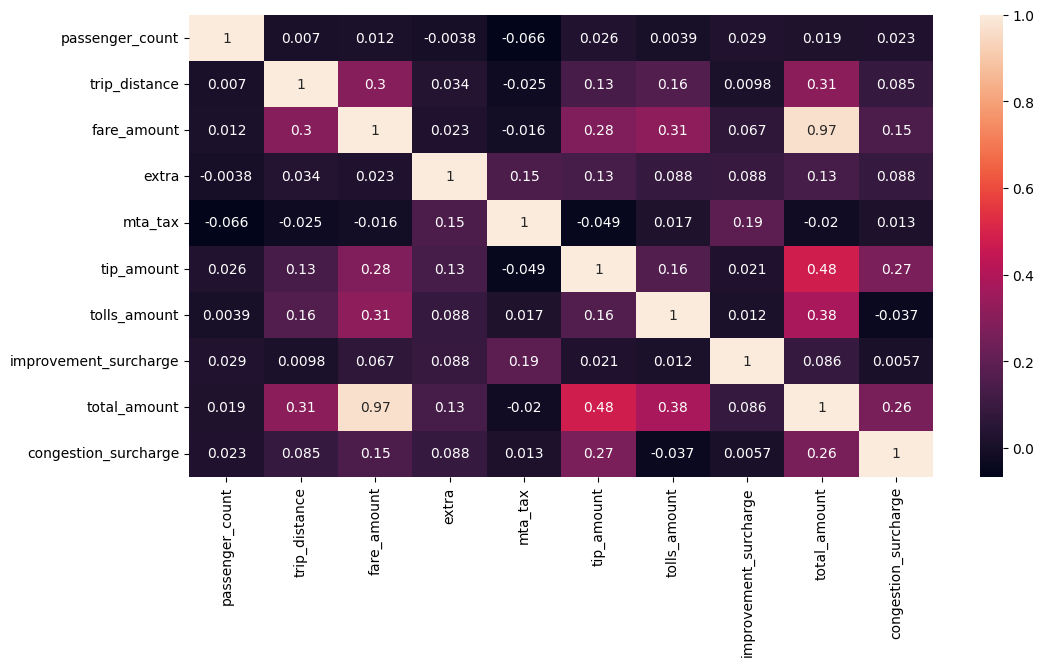

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_num.corr(), annot=True)

In [28]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = df_num.columns
vif['VIF Score'] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

vif

,features,VIF Score
0,passenger_count,2.695142
1,trip_distance,1.267174
2,fare_amount,2278.121942
3,extra,11.570648
4,mta_tax,4.693321
5,tip_amount,71.323194
6,tolls_amount,6.763612
7,improvement_surcharge,23.637452
8,total_amount,3547.457449
9,congestion_surcharge,9.771689


There is multicollinearity between **‘fare_amount’** and **‘total_amount’**. However, multicollinearity cannot be handled first because it is not explained which feature is the independent variable (label) in this data.

#### Outliers

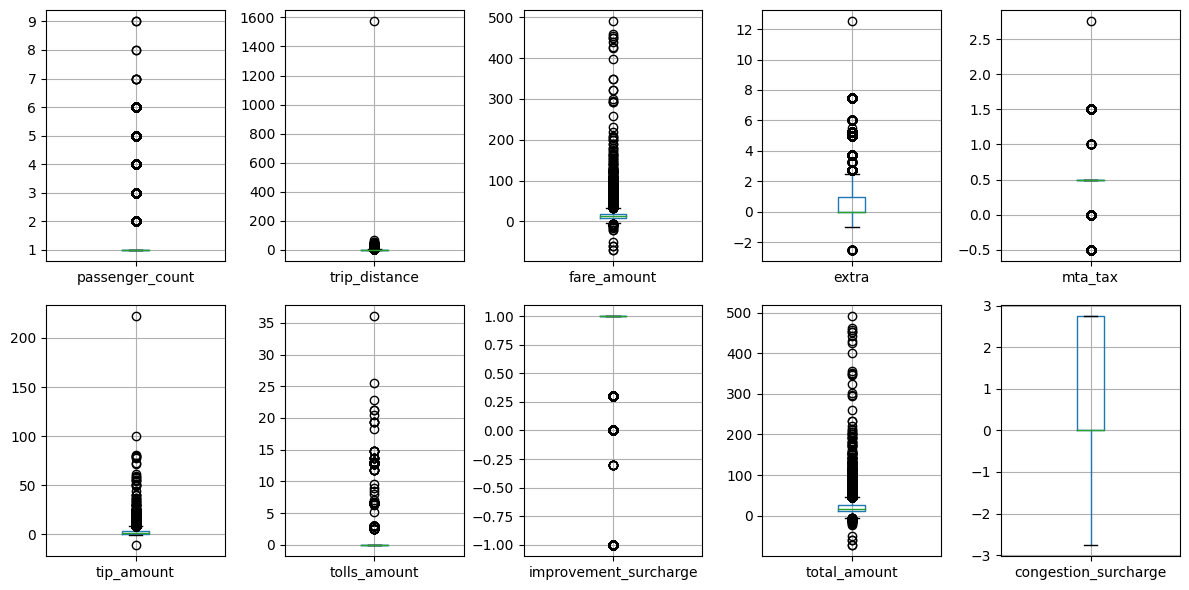

In [29]:
list_columns = list(df_num.columns.values)

num_rows = 2
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, column_name in enumerate(list_columns):
    df_num.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [30]:
for i, j in df_num.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j < q1 - 1.5 * inter_q) | (j > q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column passenger_count outliers = 14.56
Column trip_distance outliers = 8.36
Column fare_amount outliers = 6.51
Column extra outliers = 5.51
Column mta_tax outliers = 16.53
Column tip_amount outliers = 2.96
Column tolls_amount outliers = 2.18
Column improvement_surcharge outliers = 6.67
Column total_amount outliers = 5.82
Column congestion_surcharge outliers = 0.00


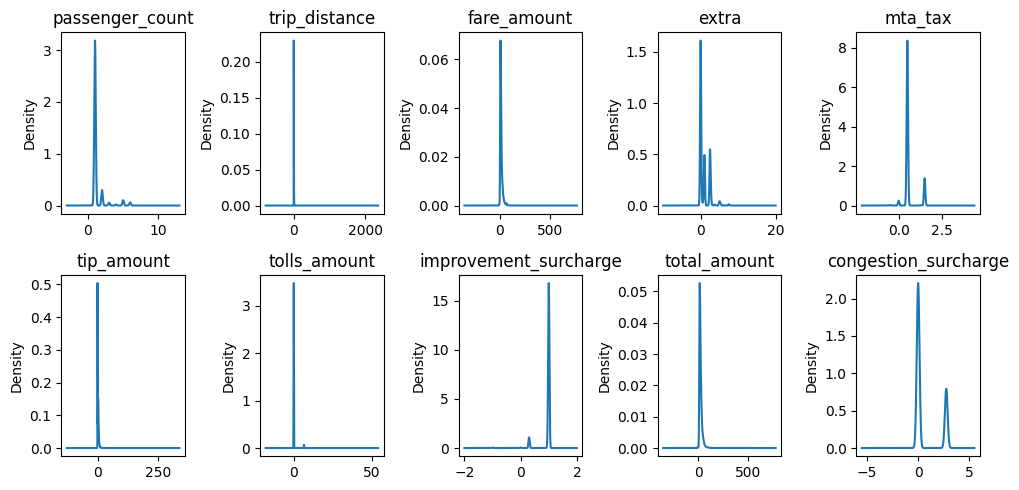

In [31]:
list_columns = list(df_num.columns.values)

num_rows = 2
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,5))

for i, column_name in enumerate(list_columns):
    df_num[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()

plt.show()

The percentage of outliers in this data is very high, so it is not possible to drop outliers because the risk is too great if outlier dropping is performed directly. Therefore, data transformation is performed using Quantile Transformer.

In [32]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')
df_num_scaled = quantile_trans.fit_transform(df_num)

In [33]:
df_num_scaled = pd.DataFrame(df_num_scaled, columns = df_num.columns)

df_num_scaled

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0.0,0.681682,0.604605,0.668669,0.444945,0.831832,0.0,1.000000,0.721321,1.000000
1,0.0,0.507007,0.371872,0.668669,0.444945,0.666166,0.0,1.000000,0.422923,0.367868
2,0.0,0.000000,0.126627,0.668669,0.444945,0.542042,0.0,1.000000,0.198699,0.367868
3,0.0,0.326326,0.088589,0.576076,0.930931,0.520521,0.0,1.000000,0.130130,0.367868
4,0.0,0.251752,0.071071,0.576076,0.930931,0.222222,0.0,1.000000,0.048549,0.367868
...,...,...,...,...,...,...,...,...,...,...
63536,0.0,0.708709,0.620621,0.286286,0.015015,0.563564,0.0,0.036036,0.493861,0.367868
63537,0.0,0.655155,0.538038,0.668669,0.444945,0.747748,0.0,1.000000,0.569570,0.367868
63538,0.0,0.368869,0.273273,0.668669,0.444945,0.628128,0.0,1.000000,0.332332,0.367868
63539,0.0,0.660160,0.538038,0.668669,0.444945,0.802302,0.0,1.000000,0.676176,1.000000


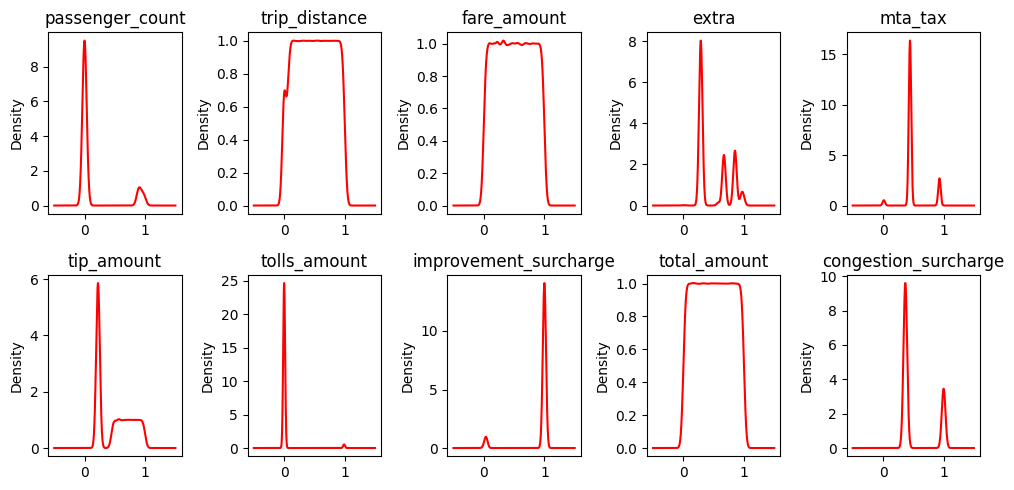

In [34]:
list_columns = list(df_num_scaled.columns.values)

num_rows = 2
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,5))

for i, column_name in enumerate(list_columns):
    df_num_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde', c='red')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

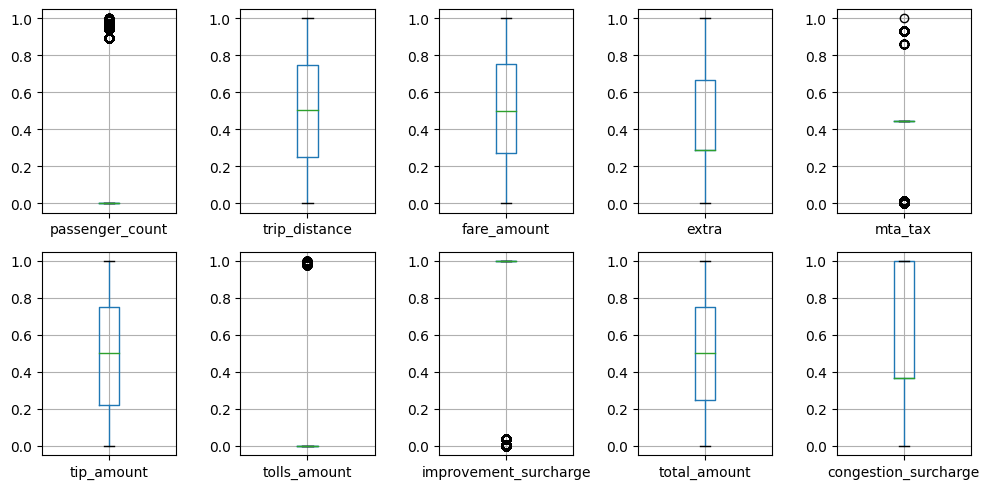

In [35]:
list_columns = list(df_num_scaled.columns.values)

num_rows = 2
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, column_name in enumerate(list_columns):
    df_num_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [36]:
for i, j in df_num_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j < q1 - 1.5 * inter_q) | (j > q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    count_outliers = np.shape(j_col)[0]
    print("Column %s percent of outliers = %.2f" %(i, percent))
    print("Column %s count of outliers = %.2f" %(i, count_outliers))
    print("\n")

Column passenger_count percent of outliers = 14.56
Column passenger_count count of outliers = 9252.00


Column trip_distance percent of outliers = 0.00
Column trip_distance count of outliers = 0.00


Column fare_amount percent of outliers = 0.00
Column fare_amount count of outliers = 0.00


Column extra percent of outliers = 0.00
Column extra count of outliers = 0.00


Column mta_tax percent of outliers = 16.53
Column mta_tax count of outliers = 10502.00


Column tip_amount percent of outliers = 0.00
Column tip_amount count of outliers = 0.00


Column tolls_amount percent of outliers = 2.18
Column tolls_amount count of outliers = 1385.00


Column improvement_surcharge percent of outliers = 6.67
Column improvement_surcharge count of outliers = 4239.00


Column total_amount percent of outliers = 0.00
Column total_amount count of outliers = 0.00


Column congestion_surcharge percent of outliers = 0.00
Column congestion_surcharge count of outliers = 0.00




### Handle Fitur Kategorikal

In [37]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,payment_type,trip_type
0,2,N,1.0,166,143,1.0,1.0
1,2,N,1.0,24,43,1.0,1.0
2,2,N,1.0,223,179,1.0,1.0
3,1,N,1.0,41,238,1.0,1.0
4,1,N,1.0,41,74,1.0,1.0
...,...,...,...,...,...,...,...
63882,2,N,5.0,130,205,1.0,2.0
63883,2,N,1.0,65,181,1.0,1.0
63884,2,N,1.0,244,116,1.0,1.0
63885,2,N,1.0,74,238,1.0,1.0


In [38]:
from category_encoders.binary import BinaryEncoder

encoder = BinaryEncoder(df_categorical, return_df=True)
df_encoded = encoder.fit_transform(df_categorical)
df_encoded

,VendorID_0,VendorID_1,store_and_fwd_flag_0,store_and_fwd_flag_1,RatecodeID_0,RatecodeID_1,RatecodeID_2,PULocationID_0,PULocationID_1,PULocationID_2,...,DOLocationID_3,DOLocationID_4,DOLocationID_5,DOLocationID_6,DOLocationID_7,payment_type_0,payment_type_1,payment_type_2,trip_type_0,trip_type_1
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
3,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,0,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
63883,0,1,0,1,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,1
63884,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
63885,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


Categorical features have been transformed using Binary Encoder. However, the dimensions are getting bigger. Therefore, Dimensionality Reduction needs to be done in the modeling process.

The conclusions that can be drawn from the EDA above are:

1. There are 68,212 data points with 20 features, but there is no clear explanation of which features are the target variables.
2. Of the 68,212 data points, cleaning was performed and it was found that approximately 6% of the 6 features had missing values, and one feature had all null values. The dropping method was applied because the 6 features shared the same missing value characteristics (within the same row).
3. There are ambiguous data points that do not align with the data description. For example, it is unlikely for the ‘passenger_count’ value to be 0, as a taxi would not activate its meter if there are no passengers.
4. Unlikely values were detected in the ‘RatecodeID’ feature, and the dropping method was applied.
5. Multicollinearity was detected between the ‘fare_amount’ and ‘total_amount’ features, but it could not be handled because it was unknown which feature was the target variable.
6. Outliers with a high percentage were detected in the data, and a transformation process was performed to address these outliers using Quantile Transformation with a Uniform distribution. The number of outliers in the data decreased significantly, although some features still had outliers.
7. Encoding was performed using a Binary Encoder on categorical features to avoid misinterpretation of integer values in the features for modeling.

Recommendations:
1. Each feature in the data needs to be clearly reinterpreted so that there is no more ambiguous or biased data.
2. Taxi vendors need to address trip data that is not entered into the system because there is more data that is not entered into the system (labeled ‘N’).
3. Taxi vendors need to instruct each driver to operate the taxi meter properly, as the existing data shows that the meter should not be turned on if there are no passengers.
4. There are 10 locations that are frequently used as pickup points, so vendors need to assign at least more drivers to those locations.
